In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [31]:
def lorenz(y, sigma=10, beta=(8 / 3), rho=28):
    """
    lorenz chaotic differential equation: dy/dt = f(t, y)
    y: 3D state vector [x, y, z]
    sigma: constant related to Prandtl number
    beta: geometric physical property of fluid layer
    rho: constant related to the Rayleigh number
    return: [x_dot, y_dot, z_dot]
    """
    return np.array(
        [
            sigma * (y[1] - y[0]),
            y[0] * (rho - y[2]) - y[1],
            (y[0] * y[1]) - (beta * y[2]),
        ]
    )


In [32]:
def rk4(func, yk, dt=0.01, sigma=10, beta=(8 / 3), rho=28):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    yk: current state vector [y1, y2, y3, ...]
    dt: discrete time step size
    returns: y evaluated at time k+1
    """

    # evaluate derivative at several stages within time interval
    f1 = func(yk, sigma, beta, rho)
    f2 = func(yk + (f1 * (dt / 2)), sigma, beta, rho)
    f3 = func(yk + (f2 * (dt / 2)), sigma, beta, rho)
    f4 = func(yk + (f3 * dt), sigma, beta, rho)

    # return an average of the derivative over tk, tk + dt
    return yk + (dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)


In [33]:
def simulate(
    dt=0.01,
    y0=np.array([-7, 8, 26]),
    sigma=10,
    beta=(8 / 3),
    rho=28,
    start=0.0,
    stop=20.0,
):
    """
    dt: discrete time step size
    y0: lorenz initial conditions (x, y, z) at t = 0
    start: start of time time series
    stop: end of time series
    """

    # simulation time range
    time = np.arange(start, stop, dt)

    # simulation results
    state_history = []

    # initialize yk
    yk = y0

    # iterate over time
    for t in time:
        # save current state
        state_history.append(yk)

        # print(f"y evaluated at time t = {t} seconds: {yk}")

        # update state variables yk to yk+1
        yk = rk4(lorenz, yk, dt, sigma, beta, rho)

    # convert list to numpy array
    state_history = np.array(state_history)

    return state_history


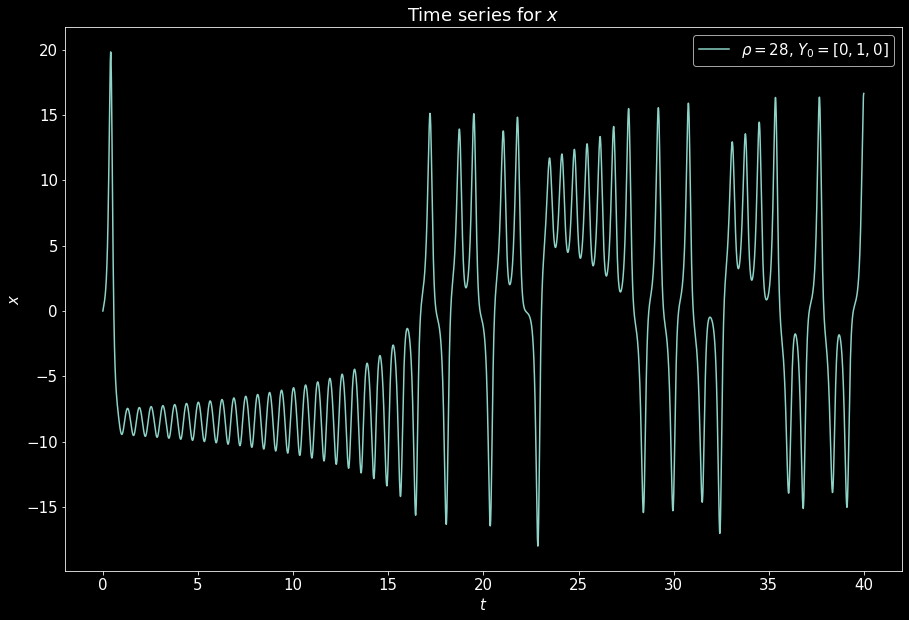

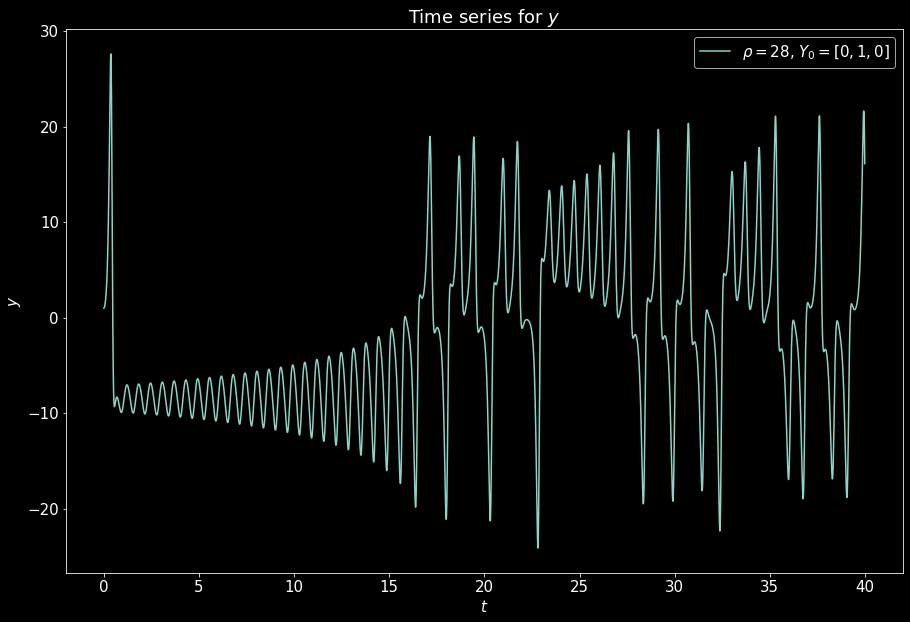

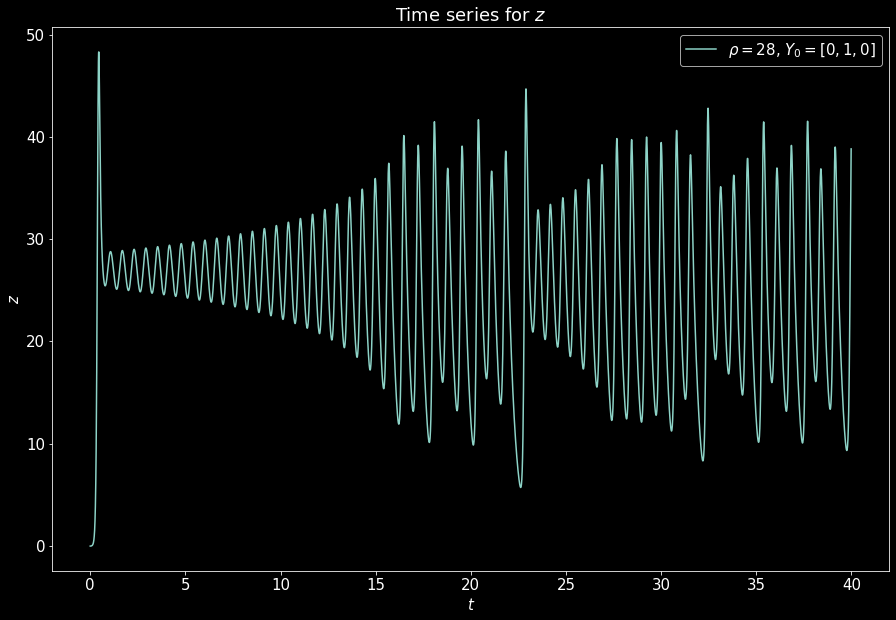

In [34]:
# Time series

plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

stop = 40.0
state_history = simulate(y0=[0, 1, 0], stop=stop)
time = np.arange(0.0, stop, 0.01)
axes = "xyz"
for i in range(3):
    plt.plot(time, state_history[:, i], label=r"$\rho=28$, $Y_0=[0,1,0]$")
    plt.title(f"Time series for ${axes[i]}$")
    plt.xlabel(r"$t$")
    plt.ylabel(f"${axes[i]}$")
    plt.legend()
    plt.savefig(f"time_series_{i}.png", dpi=300)
    plt.show()


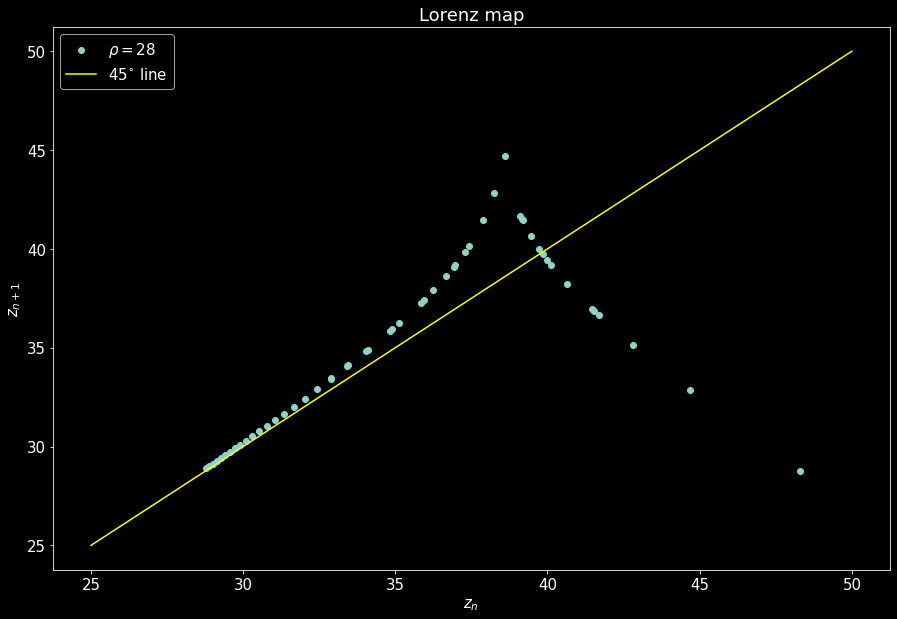

In [35]:
# Lorenz map

Z = state_history[:, 2]
Z_peaks = []
for i in range(1, len(Z) - 1):
    if Z[i - 1] <= Z[i] and Z[i] >= Z[i + 1]:
        Z_peaks.append(Z[i])


plt.scatter(Z_peaks[0:-2], Z_peaks[1:-1], label=r"$\rho=28$")
plt.plot(
    np.linspace(25, 50, 100),
    np.linspace(25, 50, 100),
    color="yellow",
    label=r"$45^{\circ}$ line",
)
plt.title("Lorenz map")
plt.ylabel(r"$z_{n+1}$")
plt.xlabel(r"$z_{n}$")
plt.legend()
plt.savefig("lorenz_map.png", dpi=300)
plt.show()


In [36]:
%%capture
# Animation

plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

state_history = simulate()
time = np.arange(0.0,20.0,0.01)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)
ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)
ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

# trajectory data to plot
(trajectory,) = ax.plot([], [], [])

ax.set(
    xlabel=r"$x$",
    ylabel=r"$y$",
    zlabel=r"$z$",
    title='The Lorenz Equations - "Lorenz Attractor Simulation"',

)
ax.w_xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.grid()

# rotate matplotlib axes
vertical_rotation_angles = np.linspace(0, 30, len(state_history[:, 0]) - 1)
horizontal_rotation_angles = np.linspace(0, 360, len(state_history[:, 0]) - 1)


def animate(i):
    # update axis view angle
    i -= len(time) * (i // len(time))
    ax.view_init(vertical_rotation_angles[i - 1], horizontal_rotation_angles[i - 1])

    # update trajectory for current time step
    trajectory.set_data(state_history[:i, 0], state_history[:i, 1])
    trajectory.set_3d_properties(state_history[:i, 2])
    return (trajectory,)


# show animation
anim = animation.FuncAnimation(
    fig, animate, interval=10, blit=False, save_count=len(time)
)
plt.show()

FFwriter = animation.FFMpegWriter(fps=30)
anim.save("lorenz_attractor.gif", writer=FFwriter)


In [37]:
%%capture
# Animation

plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

state_history_1 = simulate(y0 = [-7,8,26])
state_history_2 = simulate(y0 = [-7.25,8.25,26.25])
state_history = np.concatenate((state_history_1,state_history_2))
time = np.arange(0.0,20.0,0.01)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")
ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)
ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)
ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

# trajectory data to plot
(trajectory_1,) = ax.plot([], [], [], color="yellow")
(trajectory_2,) = ax.plot([], [], [], color='red')

ax.set(
    xlabel=r"$x$",
    ylabel=r"$y$",
    zlabel=r"$z$",
    title='The Lorenz Equations - "Butterfly Effect"',

)
ax.w_xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.grid()

# rotate matplotlib axes
vertical_rotation_angles = np.linspace(0, 30, len(state_history_1[:, 0]) - 1)
horizontal_rotation_angles = np.linspace(0, 360, len(state_history_1[:, 0]) - 1)


def animate(i):
    # update axis view angle
    i -= len(time) * (i // len(time))
    ax.view_init(vertical_rotation_angles[i - 1], horizontal_rotation_angles[i - 1])

    # update trajectory for current time step
    trajectory_1.set_data(state_history_1[:i, 0], state_history_1[:i, 1])
    trajectory_1.set_3d_properties(state_history_1[:i, 2])
    trajectory_2.set_data(state_history_2[:i, 0], state_history_2[:i, 1])
    trajectory_2.set_3d_properties(state_history_2[:i, 2])
    return (trajectory_1,trajectory_2,)


# show animation
anim = animation.FuncAnimation(
    fig, animate, interval=10, blit=False, save_count=len(time)
)
plt.show()

FFwriter = animation.FFMpegWriter(fps=30)
anim.save("lorenz_attractor2.gif", writer=FFwriter)


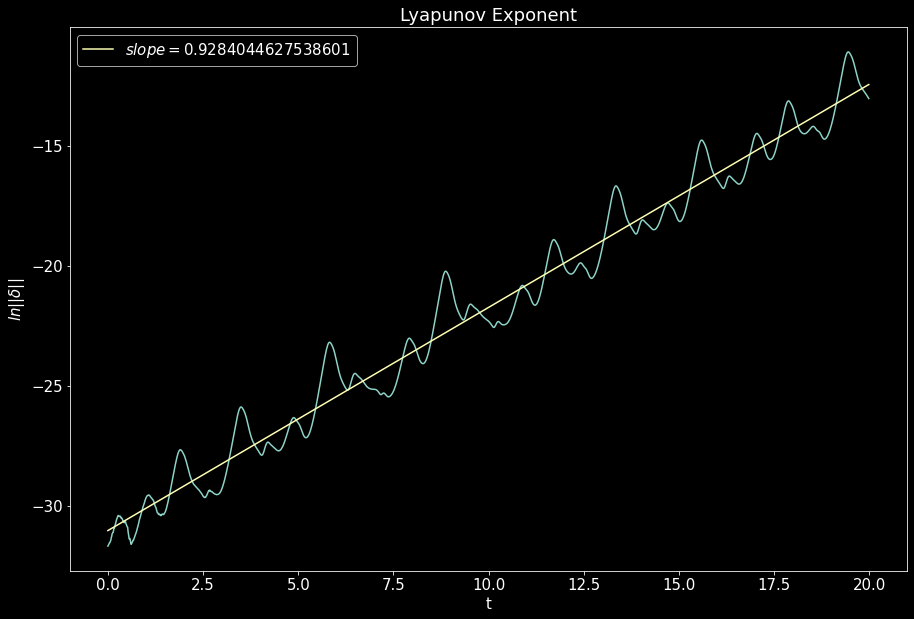

Slope =  0.9284044627538601


In [38]:
# Lyapunov Exponent

from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

state_history_1 = simulate(y0=[-7, 8, 26])
delta = 10e-15
state_history_2 = simulate(y0=[-7 + delta, 8 + delta, 26 + delta])
time = np.arange(0.0, 20.0, 0.01)
divergence = []
for i in range(len(state_history_1)):
    delta = np.linalg.norm(state_history_1[i] - state_history_2[i])
    divergence.append(np.log(delta))

slope, intercept, r, p, std_err = stats.linregress(time, divergence)


def myfunc(x):
    return slope * x + intercept


line = list(map(myfunc, time))

plt.plot(time, divergence)
plt.plot(time, line, label=rf"$slope={slope}$")
plt.title("Lyapunov Exponent")
plt.xlabel("t")
plt.ylabel(r"$ln||\delta||$")
plt.legend()
plt.savefig("lyapunov_exponent.png", dpi=300)
plt.show()
print("Slope = ", slope)


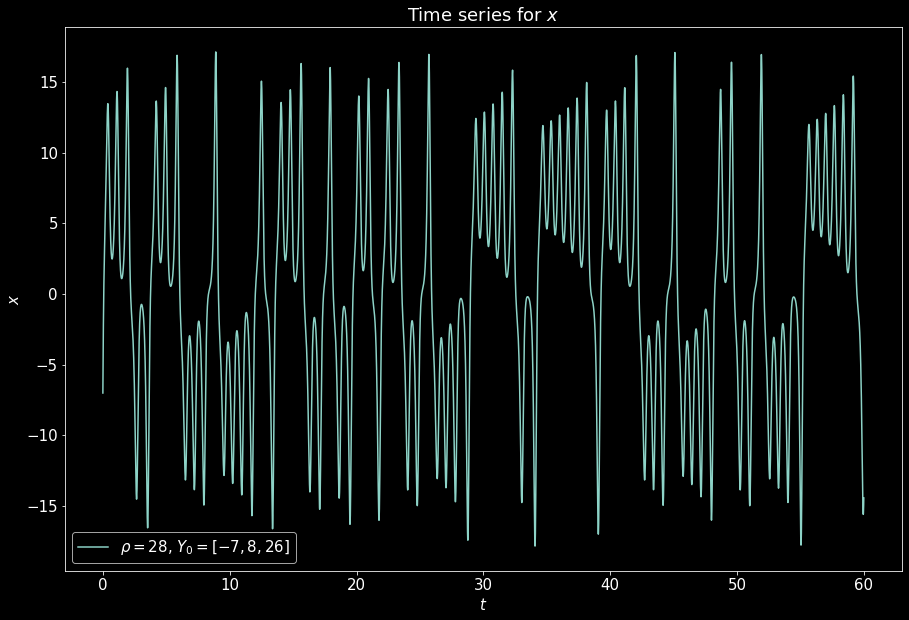

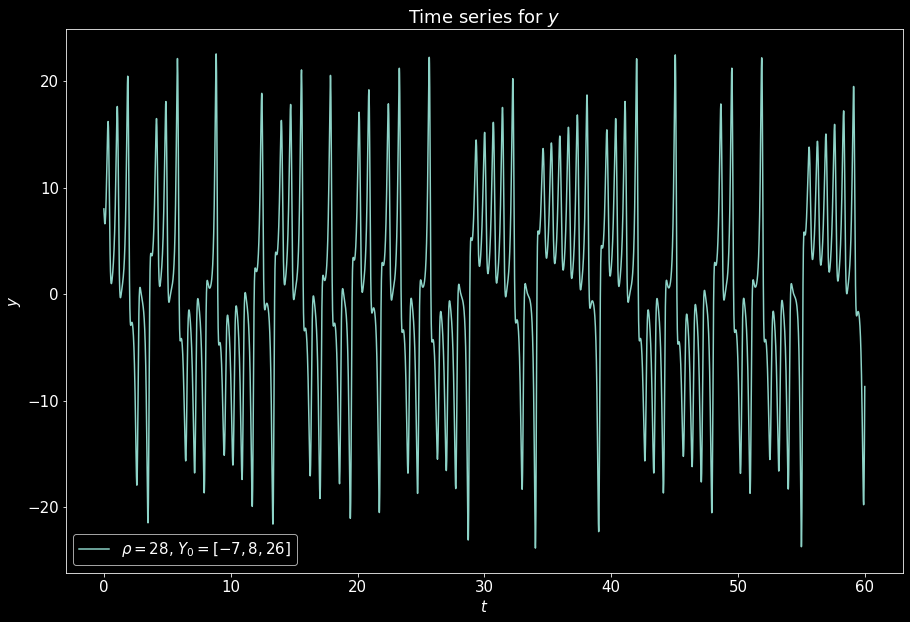

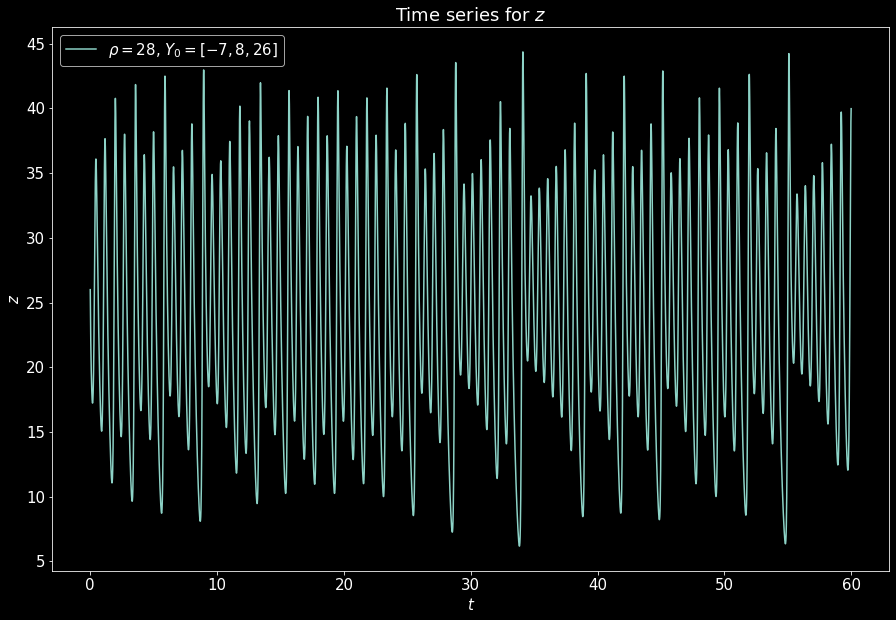

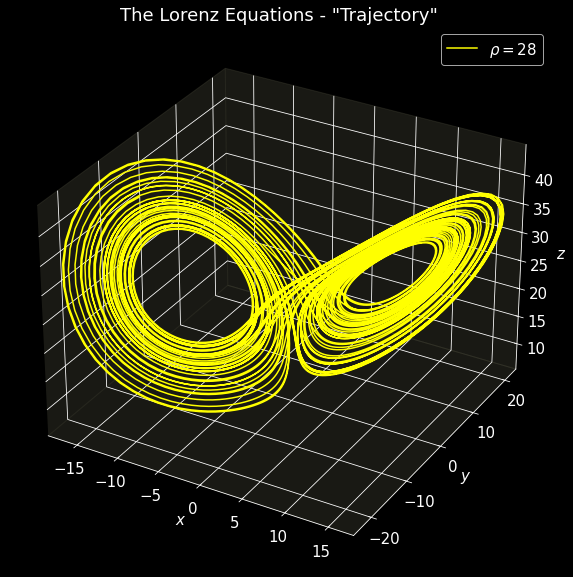

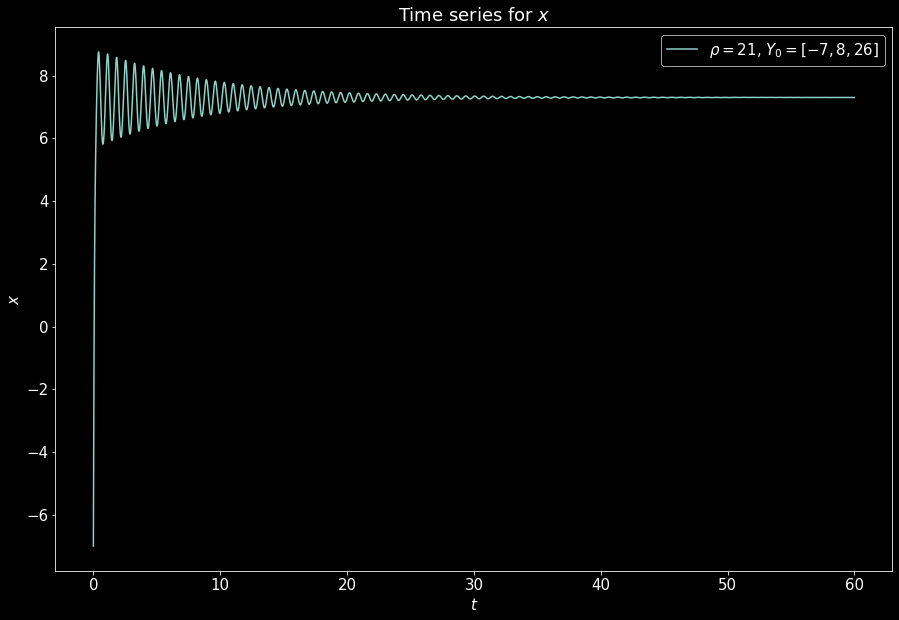

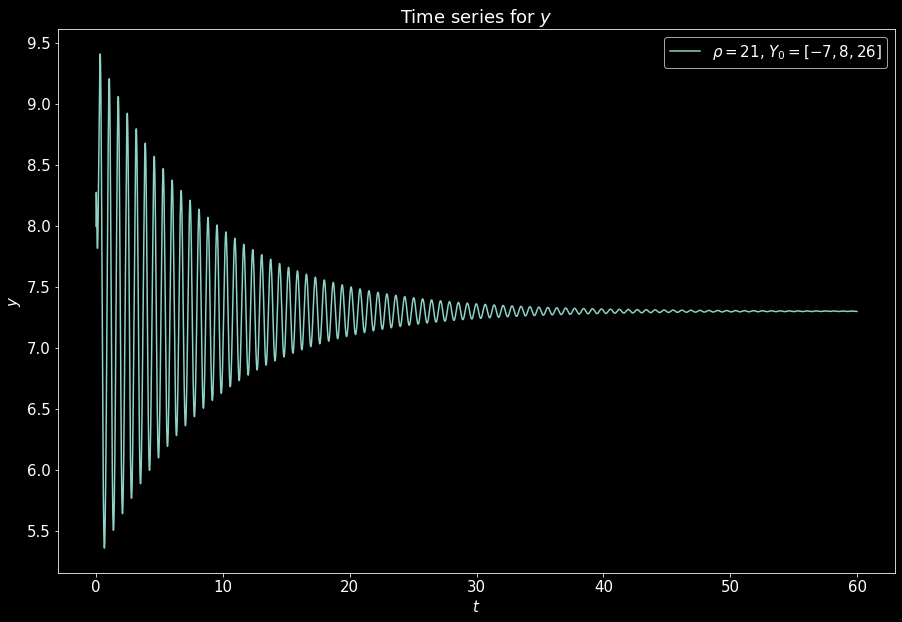

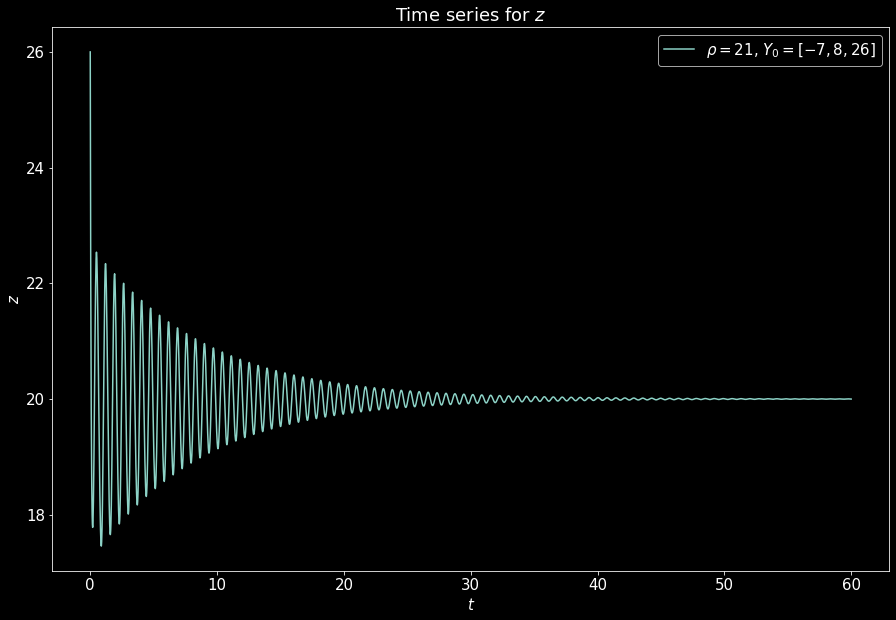

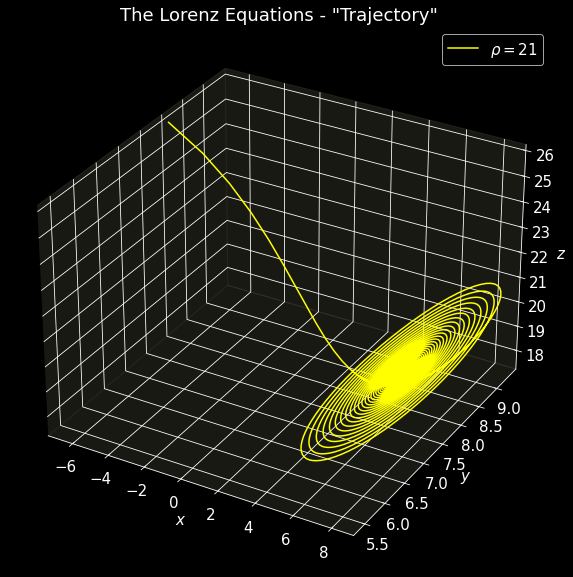

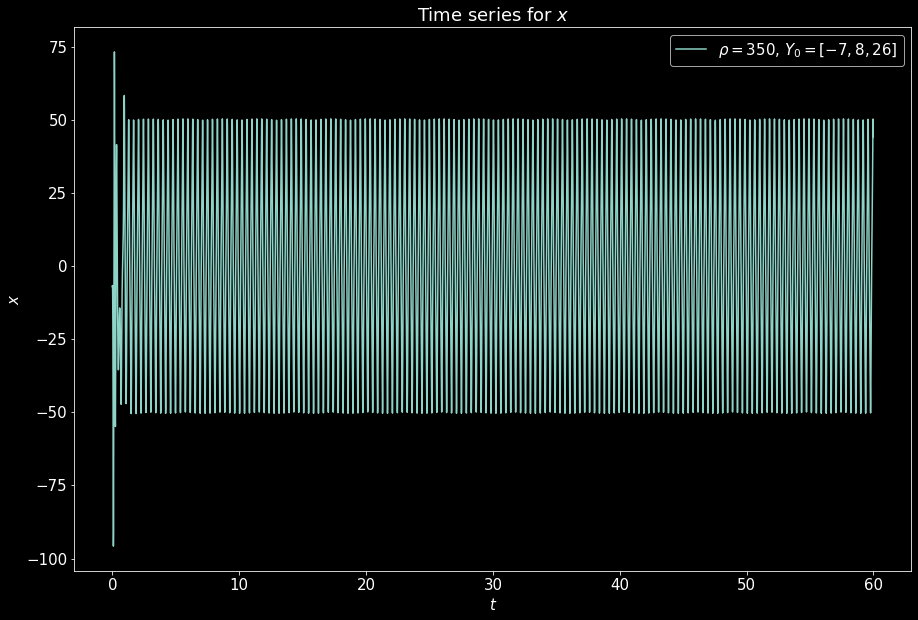

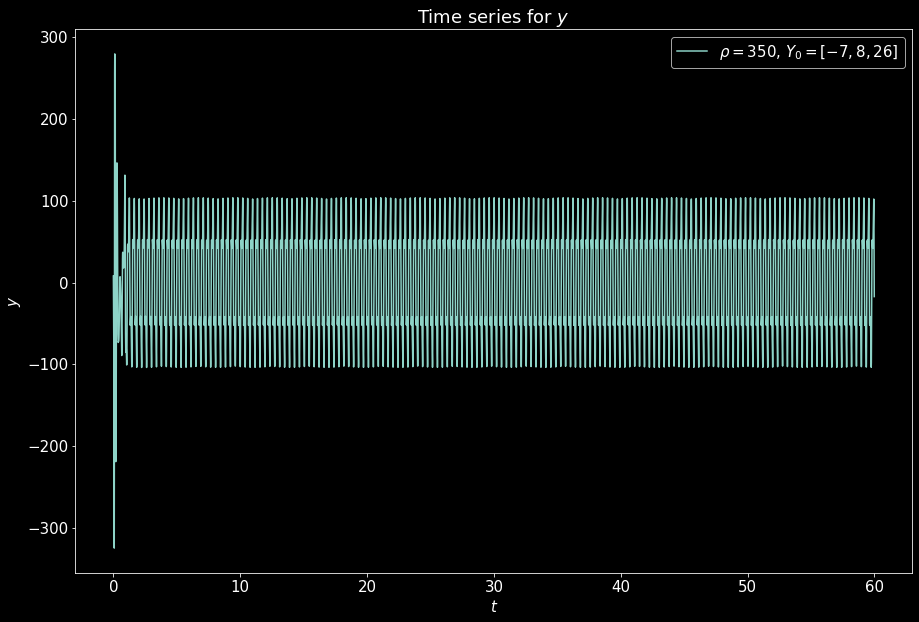

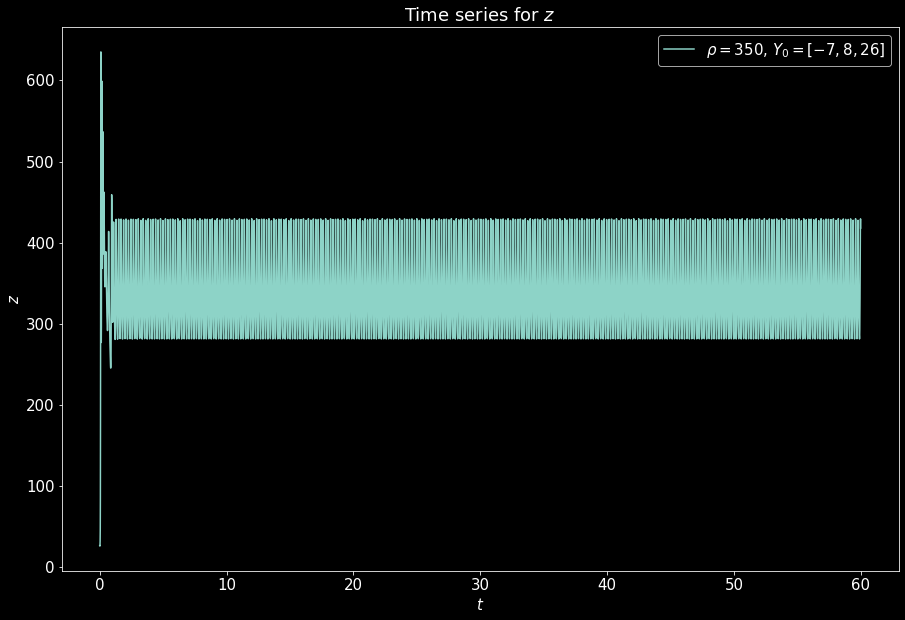

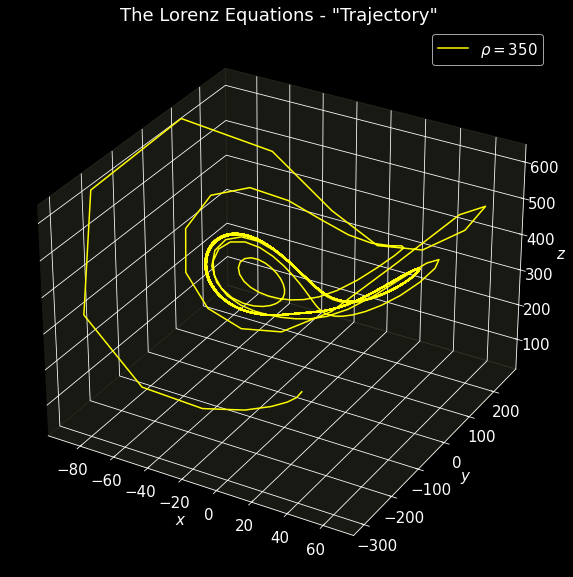

In [39]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

rhos = [28, 21, 350]
c = 0
for r in rhos:
    stop = 60.0
    state_history = simulate(rho=r, stop=stop)
    time = np.arange(0.0, stop, 0.01)
    axes = "xyz"
    for i in range(3):
        plt.plot(time, state_history[:, i], label=rf"$\rho={r}$, $Y_0=[-7,8,26]$")
        plt.title(f"Time series for ${axes[i]}$")
        plt.xlabel(r"$t$")
        plt.ylabel(f"${axes[i]}$")
        plt.legend()
        plt.savefig(f"time_series_{i}_{r}.png", dpi=300)
        plt.show()

    state_history = simulate(rho=r, stop=stop)
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)
    ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)
    ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

    ax.set(
        xlabel=r"$x$",
        ylabel=r"$y$",
        zlabel=r"$z$",
        title='The Lorenz Equations - "Trajectory"',
    )
    ax.w_xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.w_yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.w_zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.grid()

    ax.plot3D(
        state_history[:, 0],
        state_history[:, 1],
        state_history[:, 2],
        "yellow",
        label=rf"$\rho={r}$",
    )
    plt.legend()
    plt.savefig(f"phase_portrait_{c}.png", dpi=300)
    plt.show()
    c += 1


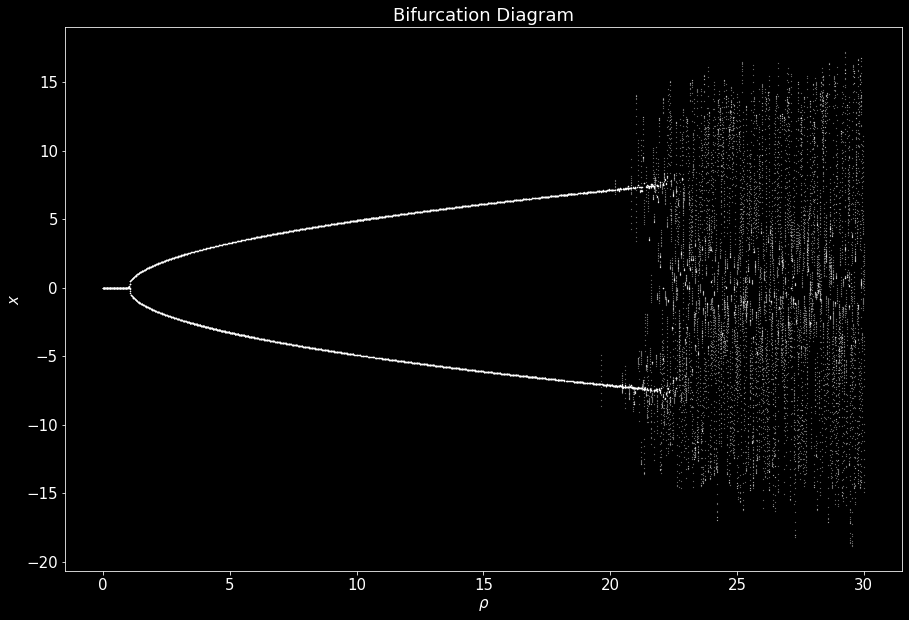

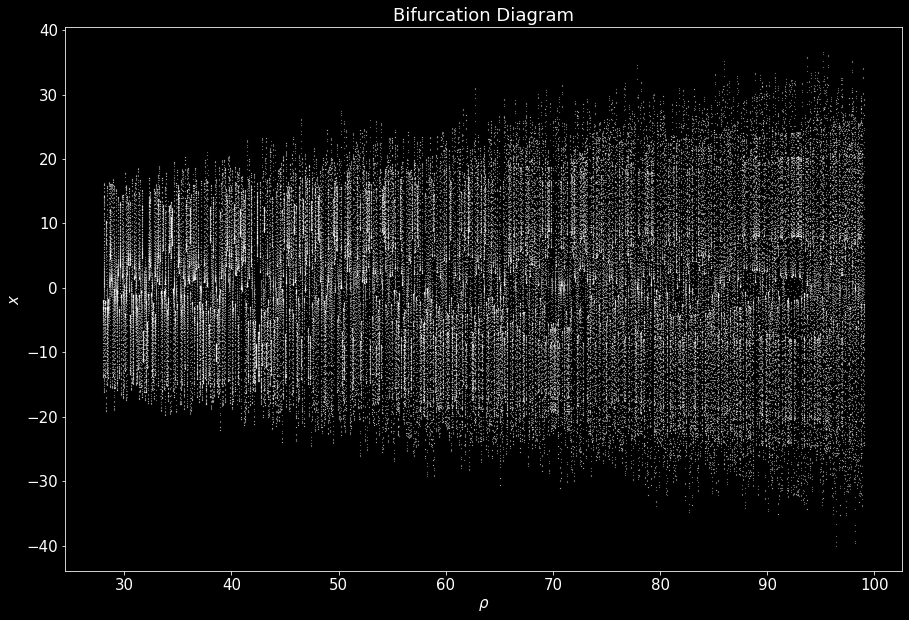

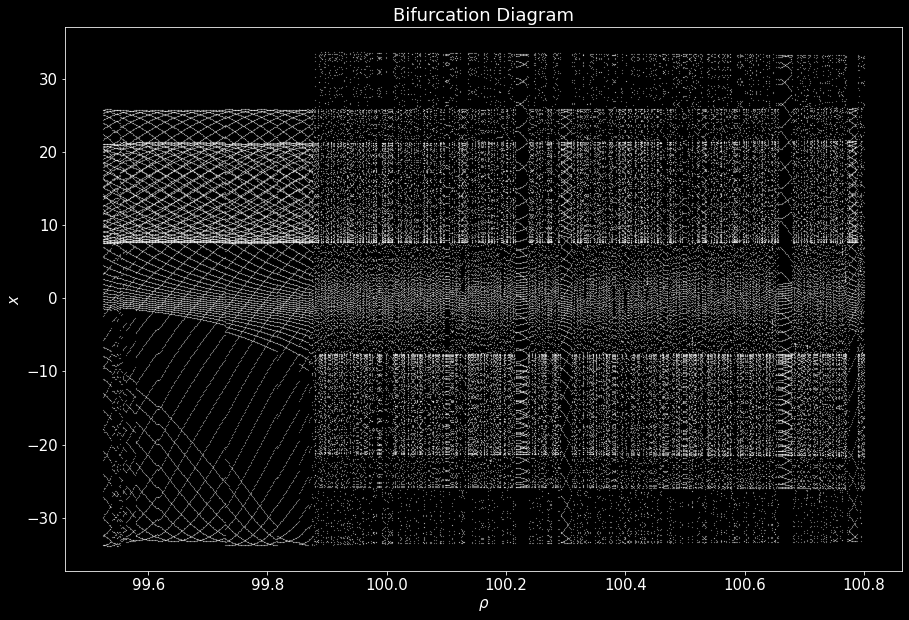

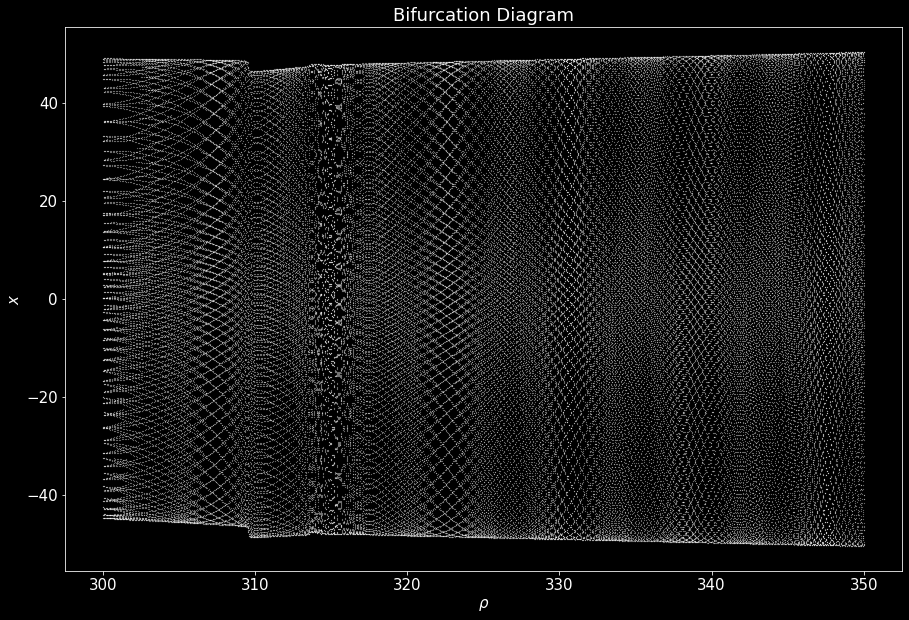

In [14]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 15})

starting_points = [[23, 56, 3], [45, 76, 23], [4, -9, 78], [-43, 7, 67]]
rho = np.linspace(0, 30, 1000)
for s in starting_points:
    for r in rho:
        state_history = simulate(y0=s, rho=r)
        length = len(state_history)
        X = state_history[-10:, 0]
        Rho = list(r * np.ones(len(X)))
        plt.scatter(Rho, X, s=0.1, color="white", marker=".")

plt.title("Bifurcation Diagram")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$x$")
plt.savefig("bifurcation_diagram_0.png", dpi=300)
plt.show()

limits = [(28, 99), (99.524, 100.8), (300, 350)]
c = 1

for a, b in limits:
    rhos = np.linspace(a, b, 1000)
    for r in rhos:
        state_history = simulate(y0=[0, 1, 0], rho=r, stop=60.0)
        length = len(state_history)
        X = state_history[-100:, 0]
        Rho = list(r * np.ones(len(X)))
        plt.scatter(Rho, X, s=0.1, color="white", marker=".")

    plt.title("Bifurcation Diagram")
    plt.xlabel(r"$\rho$")
    plt.ylabel(r"$x$")
    plt.savefig(f"bifurcation_diagram_{c}.png", dpi=300)
    plt.show()
    c += 1
